# Algerian forest fire Data Analysis
**Life cycle of Machine learning Project**

* Understanding the Problem Statement
* Data Collection
* Exploratory data analysis
* Data Cleaning
* Data Pre-Processing
* Model Training 
* Choose best model

## 1) Problem statement.

* This dataset comprises information regarding forest fires in Algerian forests.
* If user can extract some information about the relation of rain, temperature and occurence of forest fire.

# Reading the data

In [1]:
### 2.1 Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [5]:
df.iloc[:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


# Remove extra Rows and Add a new column for region

In [6]:
for index in range(df.shape[0]):
    if index < 122:
        df.loc[index,'region'] = 0
    else:
        df.loc[index,'region'] = 1

In [7]:
df.iloc[:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [8]:
df.drop(df.index[122:124], inplace=True)

In [9]:
df.iloc[:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0


In [10]:
df = df.rename(columns = {'Classes  ':'Classes','Rain ':'Rain'})

In [11]:
#Adding a column fire to indicate 0 for no fire and 1 for fire
df['fire'] = pd.factorize(df.Classes)[0]

In [12]:
#Cleaned Data Frame
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0,0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0,0


# Basic Details About Data Set

Show top 5 records

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0,0


Shape of the dataset

In [14]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,fire
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0,0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0,0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0,7


In [15]:
df.shape

(244, 16)

Summery of the dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    float64
 15  fire         244 non-null    int64  
dtypes: float64(1), int64(1), object(14)
memory usage: 32.4+ KB


Observation:
    As a lot of relevant columns are in Object type, we need to convert the type to do basic opearation.

Action:Converting desired columns into float

In [17]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region', 'fire'],
      dtype='object')

In [18]:
df = df.astype({'day':'int','month':'int','year':'int','Temperature':'int',' RH':'int',' Ws':'int','Rain':'float','FFMC':'float','DMC':'float','ISI':'float','BUI':'float'})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4    RH          244 non-null    int32  
 5    Ws          244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    float64
 15  fire         244 non-null    int64  
dtypes: float64(6), int32(6), int64(1), object(3)
memory usage: 26.7+ KB


In [20]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region,fire
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.500000,0.696721
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.501028,0.883217
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000,-1.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,0.500000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000,7.000000


In [21]:
#Dropping Year and Classes are there are no use of these two columns
df = df.drop(['year','Classes'],axis=1)

In [22]:
df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0


# Exploring Data

In [23]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 12 numerical features : ['day', 'month', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'region', 'fire']

We have 2 categorical features : ['DC', 'FWI']


# Attribute Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely Fire and not Fire
13. Region: 0 Signifies Bejaia region and 1 signifies Sidi Bel-abbes region
14. Fire: 0 indicstes fire and 1 indicates no fire

# Univariate Analysis

* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

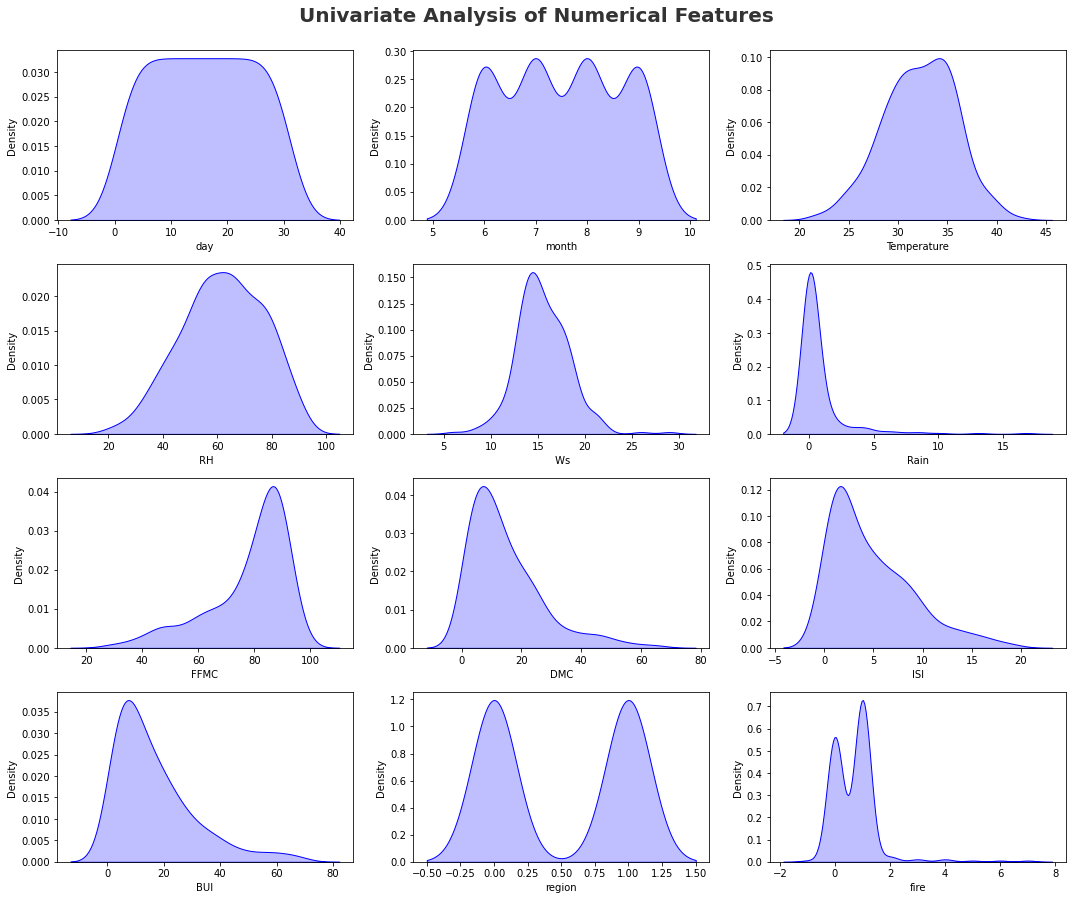

In [24]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

**Report**
* Rain, DMC, BUI, ISI are right skewed and postively skewed.
* FFMC is left skewed
* Outliers in BUI and DMC power.

# Multivariate Analysis

### Check Multicollinearity in Numerical features

In [25]:
df[(list(df.columns)[1:])].corr()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,region,fire
month,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.061680,0.085822,-9.586232e-17,0.108848
Temperature,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.607551,0.455504,2.734961e-01,0.106087
RH,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-4.064239e-01,-0.166084
Ws,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-1.768290e-01,0.012109
Rain,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-4.108006e-02,0.090625
FFMC,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,2.246798e-01,0.283148
DMC,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,1.910937e-01,0.321358
ISI,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,2.684206e-01,0.300620
BUI,8.582162e-02,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,8.736964e-02,0.332504
region,-9.586232e-17,0.273496,-0.406424,-0.176829,-0.041080,0.224680,0.191094,0.268421,0.087370,1.000000e+00,0.046498


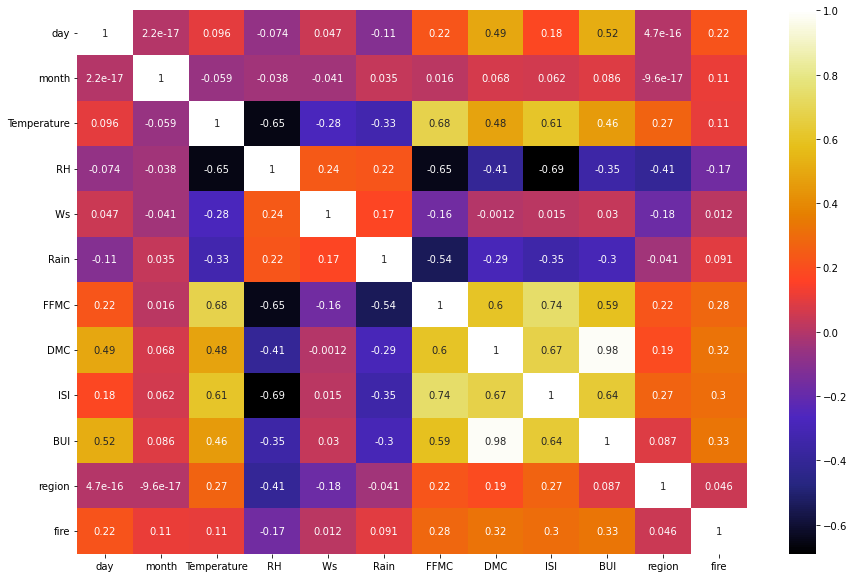

In [26]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

**Report** 
* RH is negatively corelated with Temperature, FFMC and ISI
* Rain is negatively correlated with Temperature and FFMC,DMC, ISI and BUI

# Checking Null Values

In [27]:
df.isnull().sum()

day            0
month          0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
region         0
fire           0
dtype: int64

Report: There are no null values

In [28]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['day', 'Temperature', ' RH', ' Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI']


array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>],
       [<AxesSubplot:title={'center':' RH'}>,
        <AxesSubplot:title={'center':' Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>],
       [<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'ISI'}>],
       [<AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'region'}>,
        <AxesSubplot:title={'center':'fire'}>]], dtype=object)

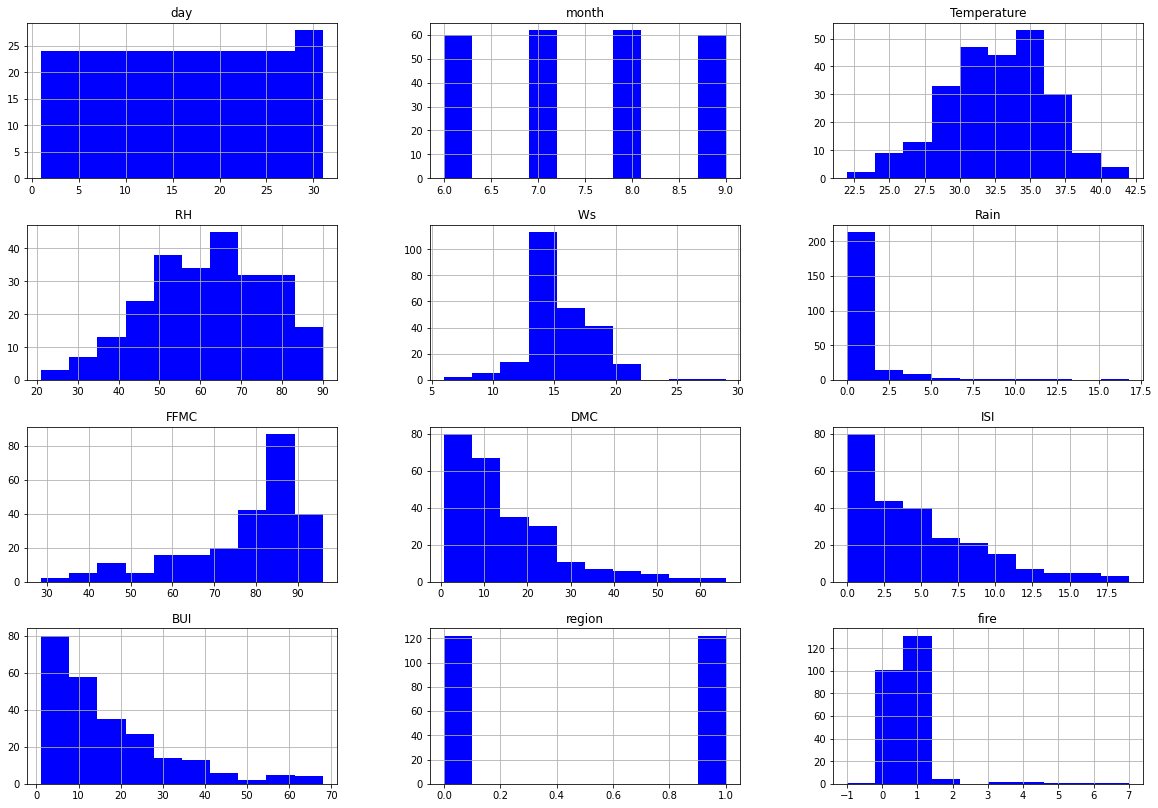

In [29]:
#Histograms
df.hist(figsize=(20,14),color='b')

Report:

<AxesSubplot:xlabel='Temperature', ylabel='day'>

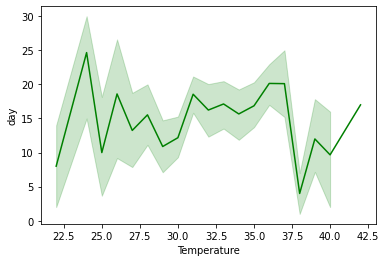

In [30]:
#Line Plot
sns.lineplot(x='Temperature',y='day', data=df,color='g')

Report:

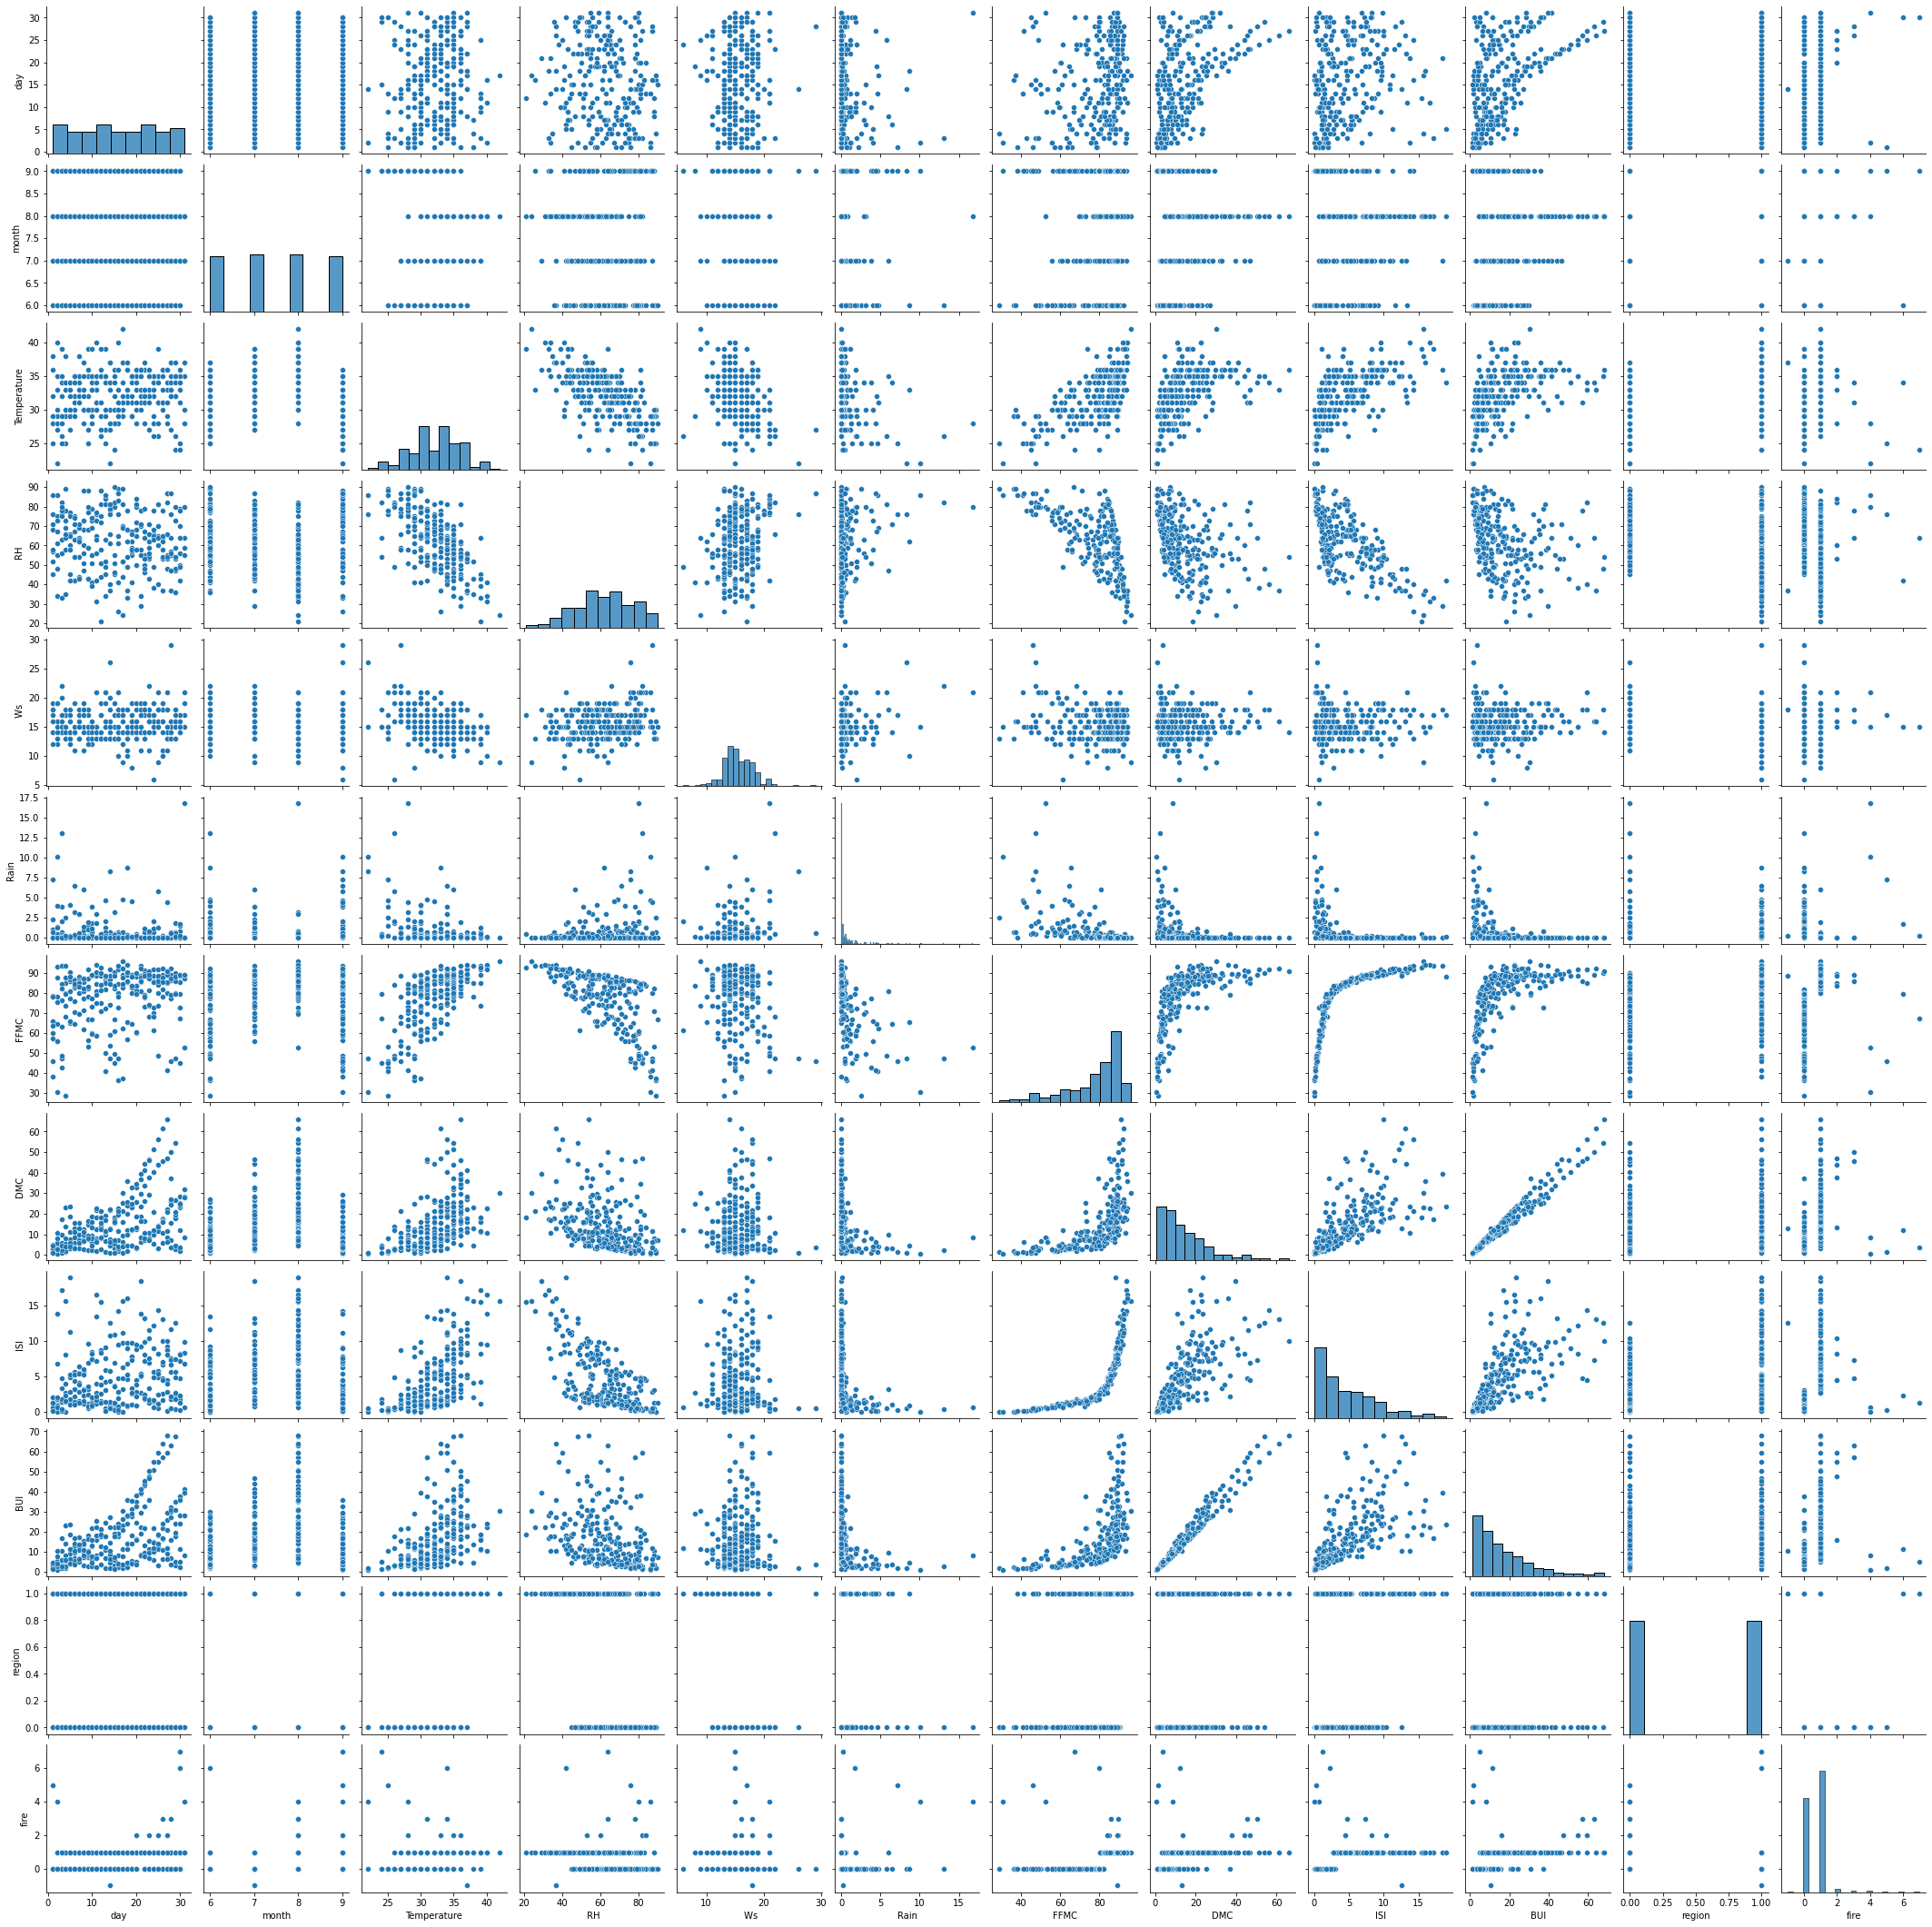

In [31]:
#Pairplot
sns.pairplot(df)

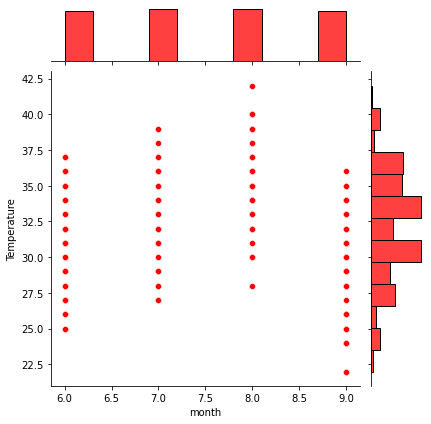

In [32]:
#Jointplot
sns.jointplot(x='month',y='Temperature',data=df,color='r')

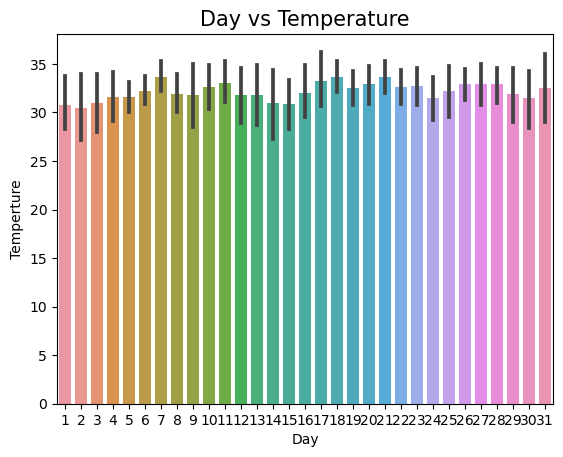

In [33]:
#Barplot
plt.style.use('default')
sns.barplot(x='day',y='Temperature',data=df)
plt.title('Day vs Temperature',fontsize=15)
plt.xlabel('Day')
plt.ylabel('Temperture')
plt.show()

# Basic analysis of data

In [34]:
#The highest temperature in the dataset
df.Temperature.max()

42

In [35]:
#The lowest temperature in the dataset
df.Temperature.min()

22

In [36]:
#When did it rain the most
highest_rain = df.sort_values(by='Rain',ascending=False)[['Rain','day','month']].head(1)
highest_rain

,Rain,day,month
91,16.8,31,8


Report: On August 31st it rain the most

In [37]:
#When did it rain the least
lowest_rain = df.sort_values(by='Rain',ascending=True)[['Rain','day','month']].head(1)
lowest_rain

,Rain,day,month
0,0.0,1,6


Report: On June 1st it rain the lowest

In [38]:
#hotest month
hotest_month = df.sort_values(by='Temperature',ascending=False)[['month']].head(1)
hotest_month 

,month
201,8


Report: June is the hotest month

In [39]:
#collest month
coolest_month = df.sort_values(by='Temperature',ascending=True)[['month']].head(1)
coolest_month

,month
105,9


Report: September is the collest month

In [59]:
#The day which was hottest , id it rain or not , from which region it belong
highest_temperature = df.sort_values(by='Temperature',ascending=False)[['Temperature','day','month','Rain','fire','region']].head(1)
highest_temperature

,Temperature,day,month,Rain,fire,region
201,42,17,8,0.0,1,1.0


Report: The day was hottsted on August 17th, it did not rain on that day and there was forest fire on that day. This happened in Sidi Bel-abbes region

In [58]:
#The day which was coolest , id it rain or not , from which region it belongs
coolest_temperature = df.sort_values(by='Temperature',ascending=True)[['Temperature','day','month','Rain','fire','region']].head(1)
coolest_temperature

,Temperature,day,month,Rain,fire,region
105,22,14,9,8.3,0,0.0


Report: The day was coolest on 14th September, it rain on that day and there was no forest fire on that day. This happened in Bejaia region

In [42]:
df_fire = df['fire']==1

In [43]:
df_fire

0      False
1      False
2      False
3      False
4      False
       ...  
241     True
242    False
243    False
244    False
245    False
Name: fire, Length: 244, dtype: bool

In [48]:
df.groupby('region')['fire']==1.count()

region
0.0    122
1.0    122
Name: fire, dtype: int64

In [52]:
fire_df = df[df['fire'] == 1] 
notfire_df = df[df['fire'] == 0] 

In [54]:
fire_df.groupby('region')['fire'].count()

region
0.0    53
1.0    78
Name: fire, dtype: int64

Report: Sidi Bel-abbes region has more fire than Bejaia region

In [55]:
Sidi_Bel_abbes_df = df[df['region'] == 1] 
Bejaia_df = df[df['region'] == 0] 

<AxesSubplot:xlabel='Temperature', ylabel='day'>

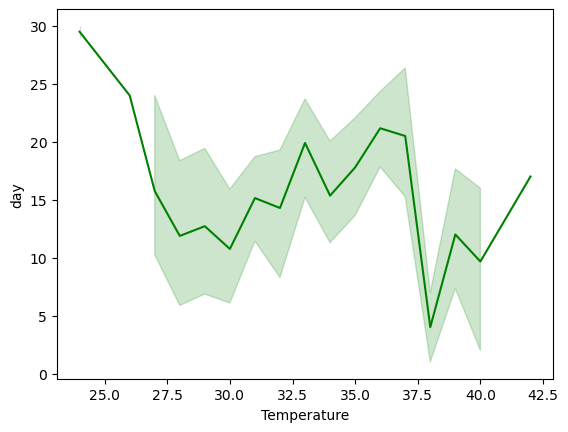

In [60]:
sns.lineplot(x='Temperature',y='day', data=Sidi_Bel_abbes_df,color='g')

<AxesSubplot:xlabel='Temperature', ylabel='day'>

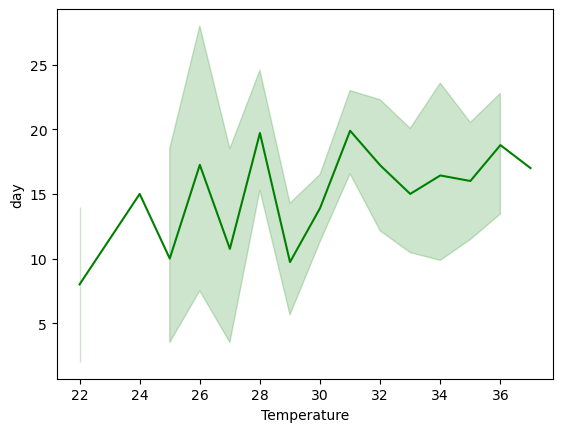

In [61]:
sns.lineplot(x='Temperature',y='day', data=Bejaia_df,color='g')

Report: Sidi Bel abbes region temperature is more unstable than Bejaia region

<AxesSubplot:xlabel='month', ylabel='Temperature'>

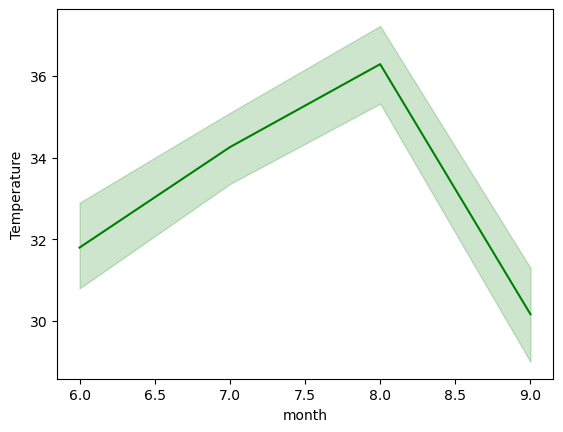

In [65]:
sns.lineplot(x='month',y='Temperature', data=Sidi_Bel_abbes_df,color='g')

<AxesSubplot:xlabel='month', ylabel='Temperature'>

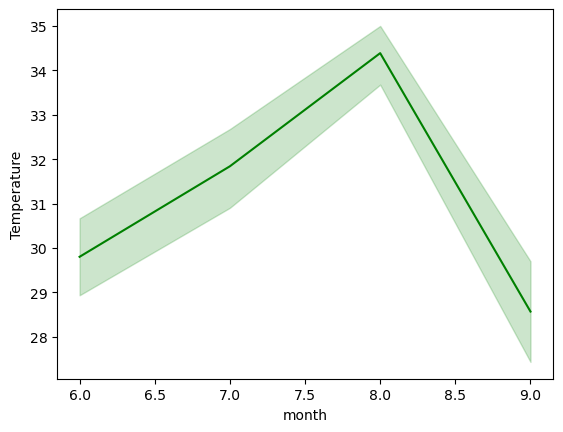

In [67]:
sns.lineplot(x='month',y='Temperature', data=Bejaia_df,color='g')

Report: In both the regions, the temperature rises till August, then it falls significantly

In [83]:
#Finding out which month there are more forest fire
fire_df.groupby('month')['fire'].count()

month
6    25
7    38
8    46
9    22
Name: fire, dtype: int64

Report: During August there are more fire and during September there are minimum